## STUDENT PERFORMANCE PREDICTION 
In this project, I will try to predict the performance of students in Math, Reading and Writing based on the variables given in the dataset. 

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# we find out the number of rows and columns in the data set above 
df.shape

(1000, 8)

In [5]:
#next we print the unique values in the categorical features 
print(df['race/ethnicity'].unique())
print(df['gender'].unique())
print(df['parental level of education'].unique())
print(df['lunch'].unique())
print(df['test preparation course'].unique())




['group B' 'group C' 'group A' 'group D' 'group E']
['female' 'male']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [6]:
#next we check if there are missing values 
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
#there are no missing values 

In [8]:
#next we check some statistical details of the dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Feature engineering 

In [9]:
#For Parental level education each the degrees have varying values so we will use label encoding technique
from sklearn.preprocessing import LabelEncoder

In [10]:
df['parental level of education']

0       bachelor's degree
1            some college
2         master's degree
3      associate's degree
4            some college
              ...        
995       master's degree
996           high school
997           high school
998          some college
999          some college
Name: parental level of education, Length: 1000, dtype: object

In [11]:
#we will perfomr ordinal replacement of the the Parental level Education
PLE = {"master's degree":1,
      "bachelor's degree":2,
      "associate's degree":3,
      "some college":4,
      "high school":5,
      "some high school":6}
df['PLE']= df['parental level of education'].map(PLE)
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,PLE
0,female,group B,bachelor's degree,standard,none,72,72,74,2
1,female,group C,some college,standard,completed,69,90,88,4
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,3
4,male,group C,some college,standard,none,76,78,75,4
5,female,group B,associate's degree,standard,none,71,83,78,3
6,female,group B,some college,standard,completed,88,95,92,4
7,male,group B,some college,free/reduced,none,40,43,39,4
8,male,group D,high school,free/reduced,completed,64,64,67,5
9,female,group B,high school,free/reduced,none,38,60,50,5


In [12]:
#we will perfomr ordinal replacement of the lunch and test preparation course
Lunch_2 = {"standard":1,
       "free/reduced":2
          }
TPC = {"completed":1,
       "none":2}
df['Lunch_2']= df['lunch'].map(Lunch_2)
df['TPC']= df['test preparation course'].map(TPC)

df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,PLE,Lunch_2,TPC
0,female,group B,bachelor's degree,standard,none,72,72,74,2,1,2
1,female,group C,some college,standard,completed,69,90,88,4,1,1
2,female,group B,master's degree,standard,none,90,95,93,1,1,2
3,male,group A,associate's degree,free/reduced,none,47,57,44,3,2,2
4,male,group C,some college,standard,none,76,78,75,4,1,2
5,female,group B,associate's degree,standard,none,71,83,78,3,1,2
6,female,group B,some college,standard,completed,88,95,92,4,1,1
7,male,group B,some college,free/reduced,none,40,43,39,4,2,2
8,male,group D,high school,free/reduced,completed,64,64,67,5,2,1
9,female,group B,high school,free/reduced,none,38,60,50,5,2,2


In [13]:
#now we will drop test preparation course, lunch and parental level of education
df.drop(['parental level of education'],axis=1, inplace=True)
df.drop(['lunch'],axis=1, inplace=True)
df.drop(['test preparation course'],axis=1, inplace=True)
df.head()



,gender,race/ethnicity,math score,reading score,writing score,PLE,Lunch_2,TPC
0,female,group B,72,72,74,2,1,2
1,female,group C,69,90,88,4,1,1
2,female,group B,90,95,93,1,1,2
3,male,group A,47,57,44,3,2,2
4,male,group C,76,78,75,4,1,2


In [14]:
#we will now perform one hot encoding for the remaining categorical variables 
df=pd.get_dummies(df, drop_first=True)
df.head()

,math score,reading score,writing score,PLE,Lunch_2,TPC,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,72,72,74,2,1,2,0,1,0,0,0
1,69,90,88,4,1,1,0,0,1,0,0
2,90,95,93,1,1,2,0,1,0,0,0
3,47,57,44,3,2,2,1,0,0,0,0
4,76,78,75,4,1,2,1,0,1,0,0


In [15]:
#now we find out the correlation of the features
df.corr()

,math score,reading score,writing score,PLE,Lunch_2,TPC,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
math score,1.000000,0.817580,0.802642,-0.159432,-0.350877,-0.177702,0.167982,-0.084250,-0.073387,0.050071,0.205855
reading score,0.817580,1.000000,0.954598,-0.190908,-0.229560,-0.241780,-0.244313,-0.060283,-0.003074,0.035177,0.106712
writing score,0.802642,0.954598,1.000000,-0.236715,-0.245769,-0.312946,-0.301225,-0.078254,-0.010203,0.082032,0.089077
PLE,-0.159432,-0.190908,-0.236715,1.000000,-0.023259,-0.007143,0.043934,0.070537,-0.039925,-0.015235,-0.058563
Lunch_2,-0.350877,-0.229560,-0.245769,-0.023259,1.000000,-0.017044,-0.021372,0.008257,0.003385,0.009458,-0.052398
TPC,-0.177702,-0.241780,-0.312946,-0.007143,-0.017044,1.000000,-0.006028,0.000106,-0.012522,0.055956,-0.059393
gender_male,0.167982,-0.244313,-0.301225,0.043934,-0.021372,-0.006028,1.000000,-0.028466,-0.063368,0.030566,0.020302
race/ethnicity_group B,-0.084250,-0.060283,-0.078254,0.070537,0.008257,0.000106,-0.028466,1.000000,-0.331479,-0.288574,-0.195411
race/ethnicity_group C,-0.073387,-0.003074,-0.010203,-0.039925,0.003385,-0.012522,-0.063368,-0.331479,1.000000,-0.407797,-0.276145
race/ethnicity_group D,0.050071,0.035177,0.082032,-0.015235,0.009458,0.055956,0.030566,-0.288574,-0.407797,1.000000,-0.240402


In [16]:
import seaborn as sns

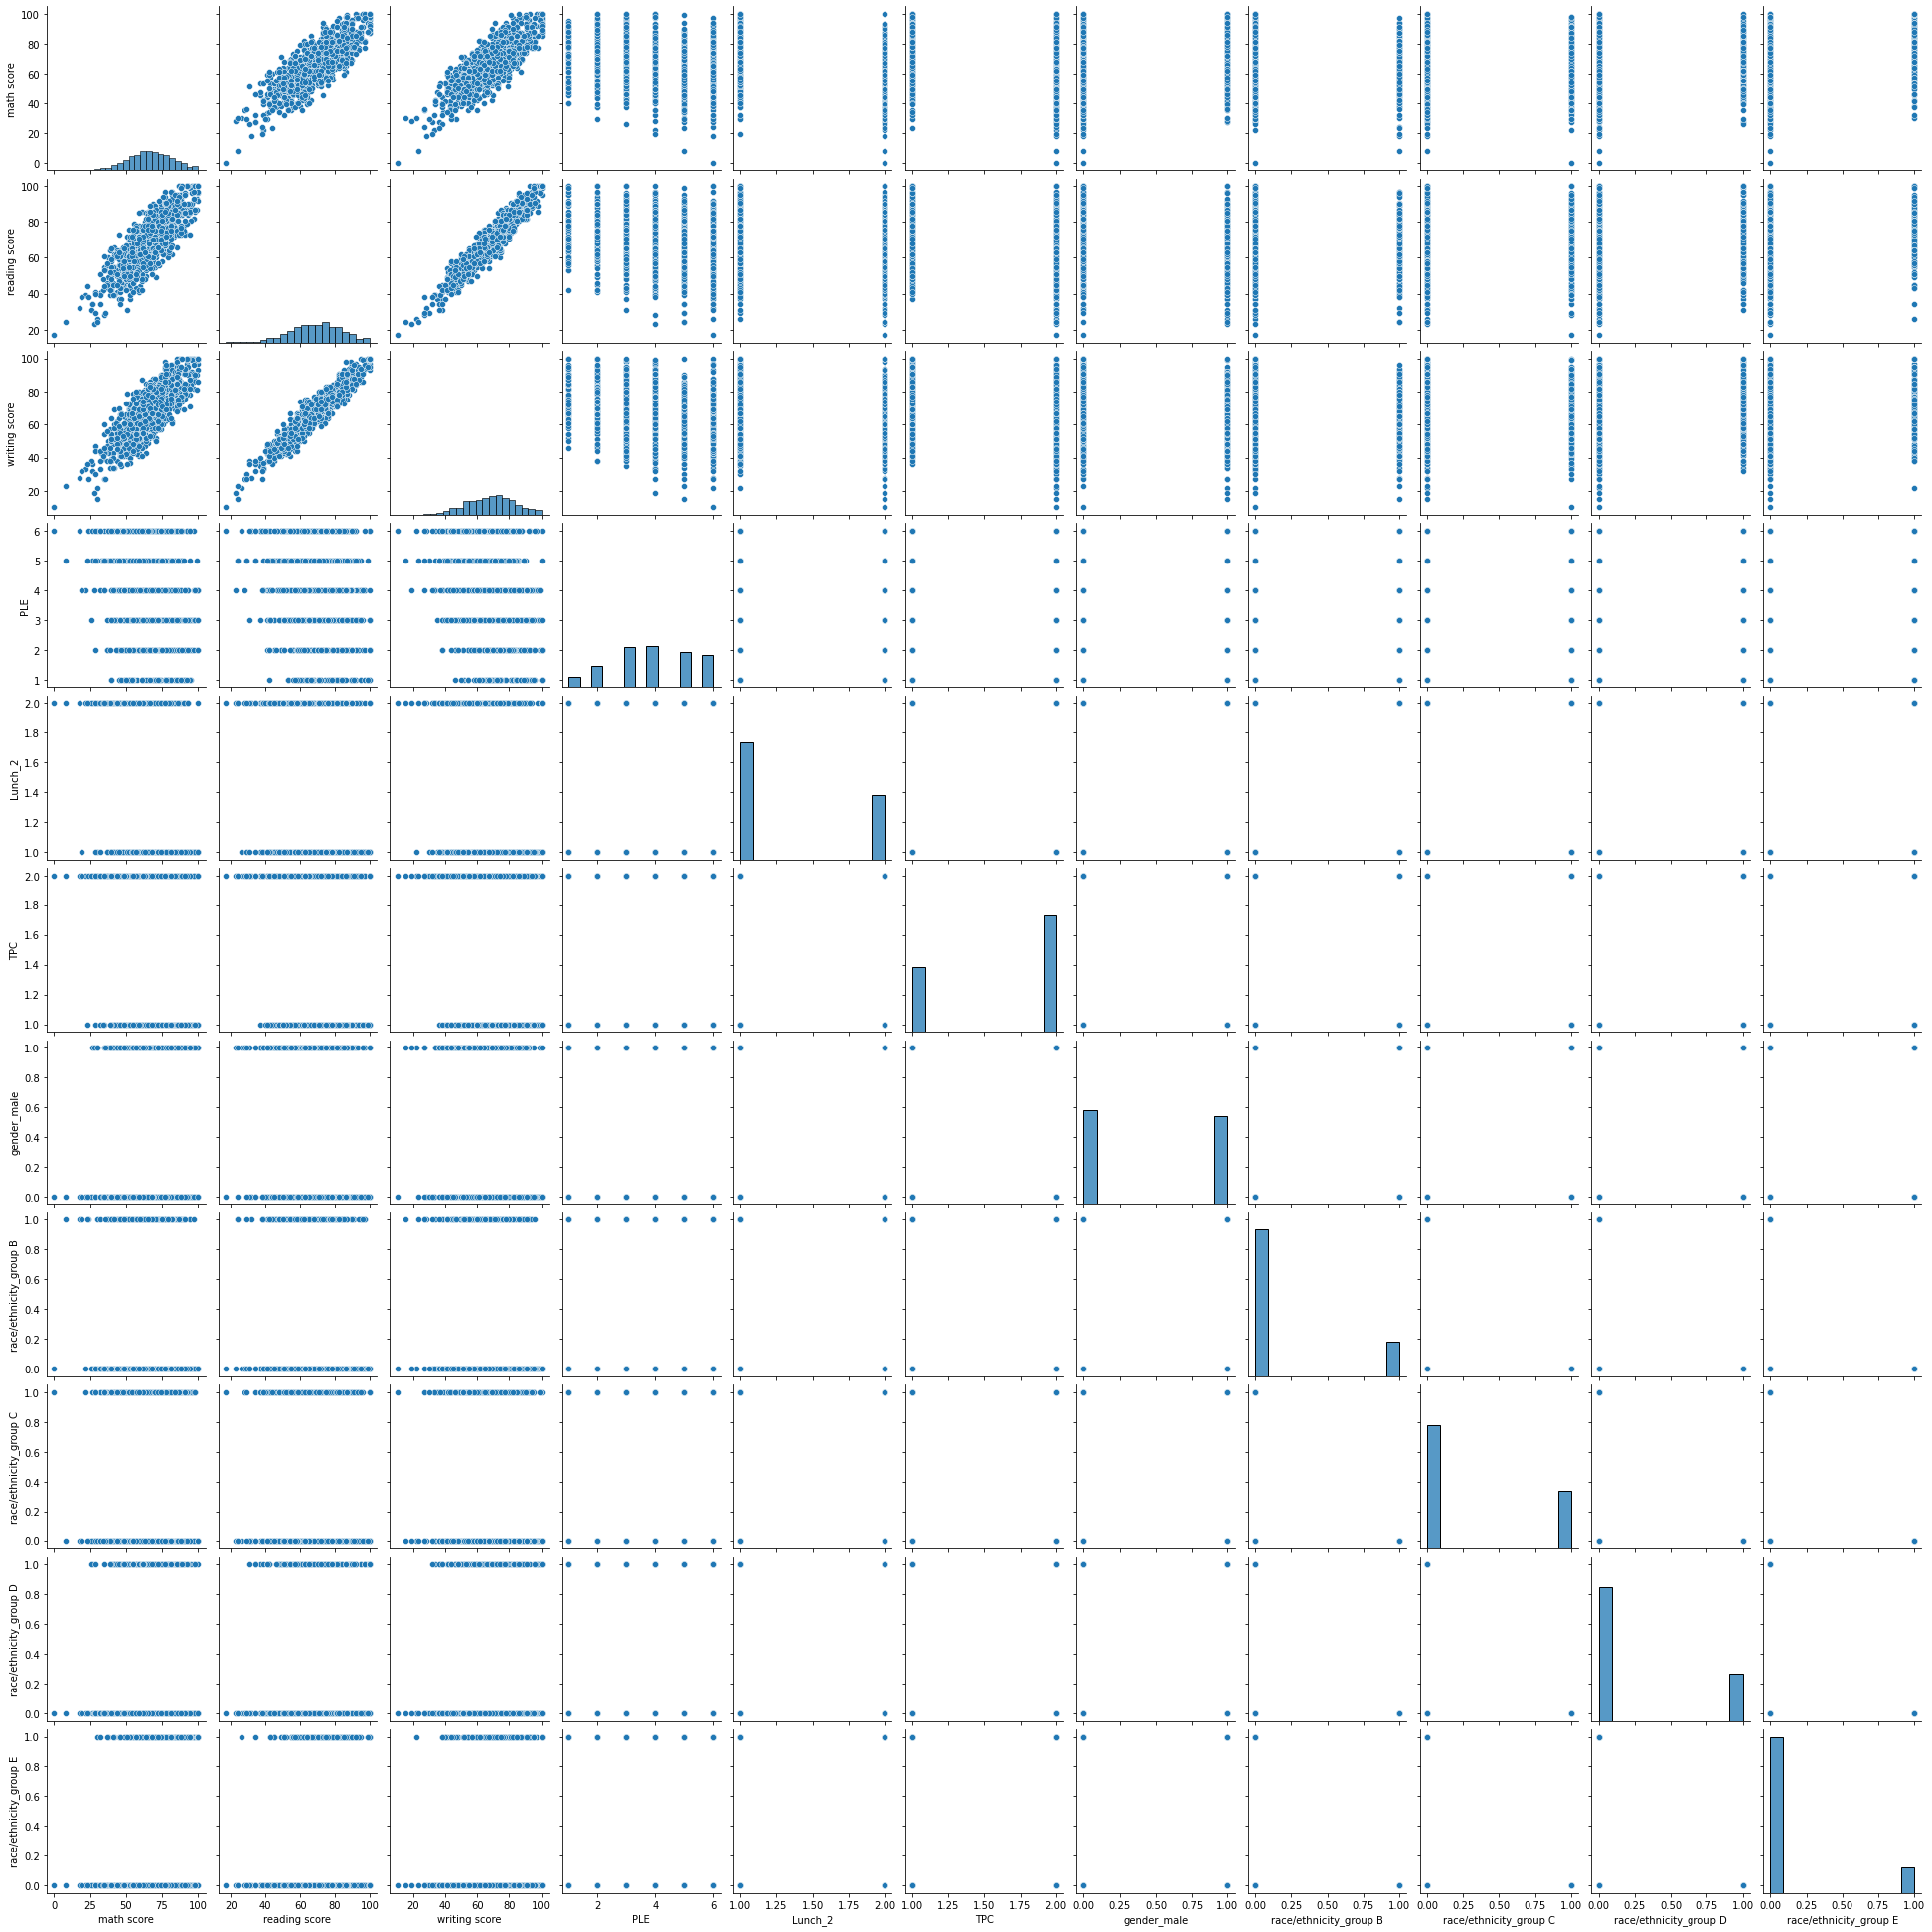

In [17]:
sns.pairplot(df)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

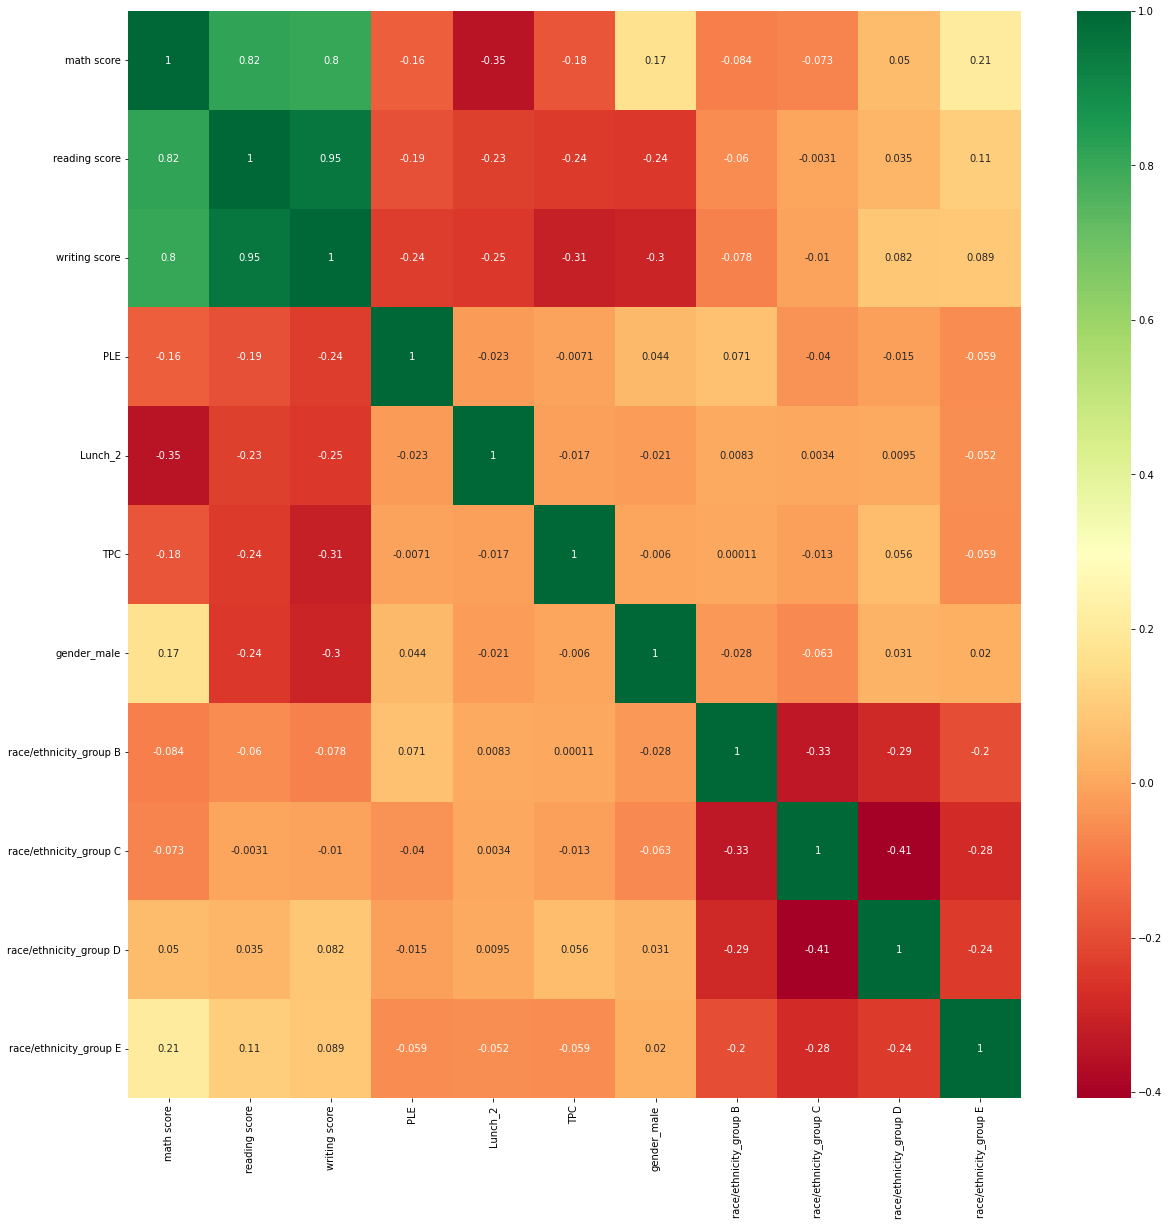

In [19]:
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#plot heatmap
g=sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [20]:
df.head()

,math score,reading score,writing score,PLE,Lunch_2,TPC,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,72,72,74,2,1,2,0,1,0,0,0
1,69,90,88,4,1,1,0,0,1,0,0
2,90,95,93,1,1,2,0,1,0,0,0
3,47,57,44,3,2,2,1,0,0,0,0
4,76,78,75,4,1,2,1,0,1,0,0


In [21]:
#we select our dependent and independent features 
X= df.iloc[:,3:]
y=df.iloc[:,0:3]

In [22]:
#dependent features 
y.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [23]:
#independent features
X.head()

,PLE,Lunch_2,TPC,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,2,1,2,0,1,0,0,0
1,4,1,1,0,0,1,0,0
2,1,1,2,0,1,0,0,0
3,3,2,2,1,0,0,0,0
4,4,1,2,1,0,1,0,0


In [24]:
#now we find out the important features 
from sklearn.ensemble import ExtraTreesRegressor
model= ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [25]:
print(model.feature_importances_)

[0.27958618 0.1990827  0.16769792 0.16008385 0.05376109 0.04923114
 0.04584314 0.04471399]


<AxesSubplot:>

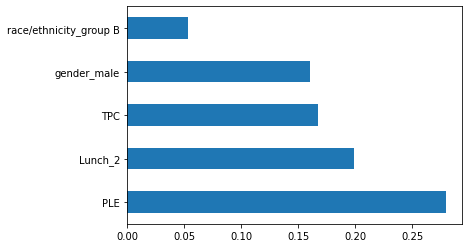

In [26]:
#we will plot a graph for better vizualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')

#### From the graph above we can see that Parent Level Education, Launch,and Test Preparation course are the most important features


In [27]:
#now we create a train-test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [28]:
X_train.shape

(800, 8)

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [30]:
#now we perfrom hyperparameter tuning for better accuarcy using the randomforest regressor
#we will use randomizedsearchCV to help select the best parameters for the randomforestregressor
import numpy as np

#number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start = 100, stop=1200, num= 12)]

#number of features to consider at every split
max_features= ['auto', 'sqrt']

#maximum number of levels
max_depth= [int(x) for x in np.linspace(5,30, num=6)]

# max_depth.append(None)

#Minimum number of samples required to split a node
min_samples_split= [2,5,10,25,100]

#Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]


In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
#create a randomgrid
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 25, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [33]:
#RandomizedsearchCV will select the best hpperparameters from the random grid 
#but first we create a base model to tune 
rf= RandomForestRegressor()

In [34]:
rf_random= RandomizedSearchCV(estimator= rf, param_distributions= random_grid,n_iter=10, scoring= 'neg_mean_squared_error', cv=5, verbose= 2, random_state=42, n_jobs=1)

In [35]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 25,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [36]:
predictions=rf_random.predict(X_test)

In [37]:
predictions

array([[58.39872137, 67.88796024, 67.371347  ],
       [68.15695863, 75.00913977, 74.52270504],
       [68.91375224, 76.72149592, 77.34161607],
       [69.23222047, 75.22578554, 74.98509493],
       [58.39872137, 67.88796024, 67.371347  ],
       [58.39872137, 67.88796024, 67.371347  ],
       [61.86890746, 72.81095303, 74.30049202],
       [75.1345986 , 78.51224251, 79.2096286 ],
       [69.14822068, 68.27312445, 67.64709905],
       [56.74266674, 66.70457977, 65.14490389],
       [72.56494924, 78.84247167, 79.41635376],
       [65.22761579, 61.71040567, 59.1851733 ],
       [70.81147763, 77.88842928, 78.25811305],
       [65.87629028, 72.45614738, 71.81823719],
       [65.15860392, 61.09861323, 56.8289791 ],
       [73.84899502, 77.32013858, 76.28661578],
       [62.17997174, 69.3168503 , 68.26332184],
       [72.42736779, 80.97903476, 82.81343826],
       [67.28078059, 73.99600656, 74.17663627],
       [70.95196009, 68.52518988, 66.47649455],
       [70.10489277, 67.79435127, 66.909

C:\anaconda\envs\studentgrade\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

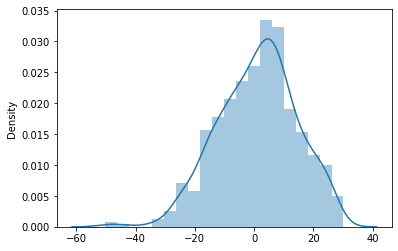

In [38]:
sns.distplot(y_test-predictions)

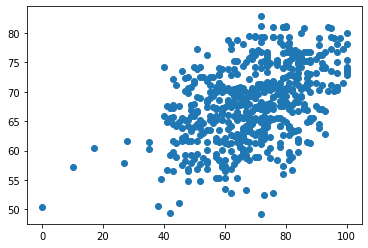

In [39]:
plt.scatter(y_test, predictions)

In [42]:
#Store the data 

In [43]:
import pickle
file = open('student_performance_model.pkl', 'wb')
#dump information to that file
pickle.dump(rf_random, file)